# 3팀 EDA 프로젝트! (World Happiness Report)

## Setup

In [28]:
import numpy as np                        # numerical ops
import pandas as pd                       # data wrangling
import matplotlib.pyplot as plt           # plotting
import seaborn as sns                     # statistical plots

sns.set_theme(style="whitegrid")          # seaborn 스타일

## 01. 데이터 수집 & 로딩

In [17]:
df = pd.read_csv('data/2019.csv')

Shape: (156, 9)
데이터 크기: (156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### 총 **156 행 × 9열**의 데이터이며, 범주형은 `Country or region` 한 열이고 나머지는 모두 수치형이다.


## 02. 구조 & 변수 이해

In [30]:
print("Shape:", df.shape)
print(df.dtypes)
print(df.head())

Shape: (156, 10)
Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
gdp_outlier                        bool
dtype: object
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986              

모든 열에서 결측치가 **0개**로 나타나 별도의 결측치 처리 과정이 필요 없다.

## 03. 요약 통계

In [31]:
print(df.describe())

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

## 04. 결측치 & 이상치

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
gdp_outlier                     0
dtype: int64


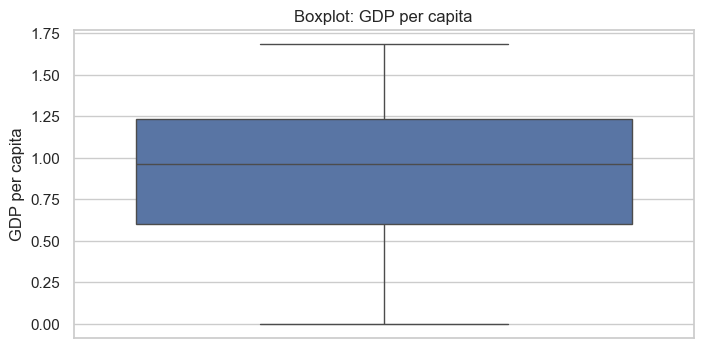

In [32]:
print(df.isnull().sum())

plt.figure(figsize=(8, 4))
sns.boxplot(y=df["GDP per capita"])
plt.title("Boxplot: GDP per capita")
plt.show()

## 05. 변수 분포

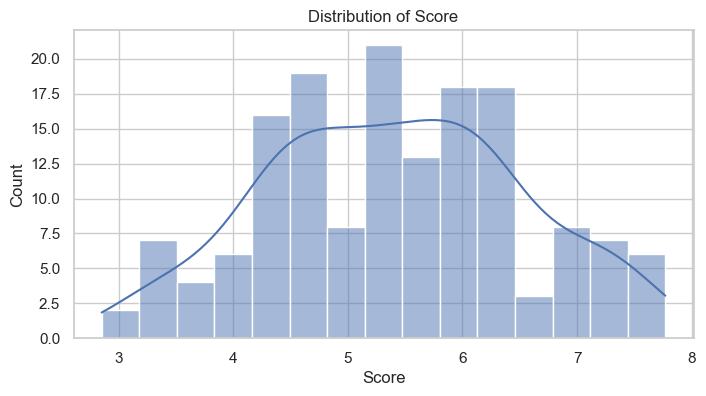

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Score"], bins=15, kde=True)
plt.title("Distribution of Score")
plt.show()

## 06. 변수 간 관계

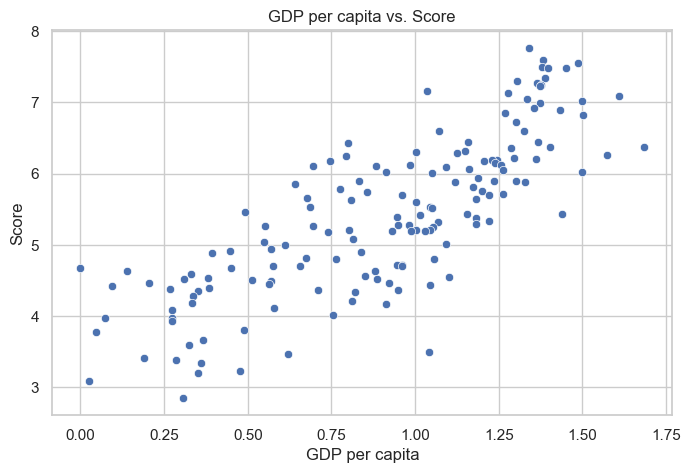

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="GDP per capita", y="Score", data=df)
plt.title("GDP per capita vs. Score")
plt.show()

# 07. 상관관계(heatmap)

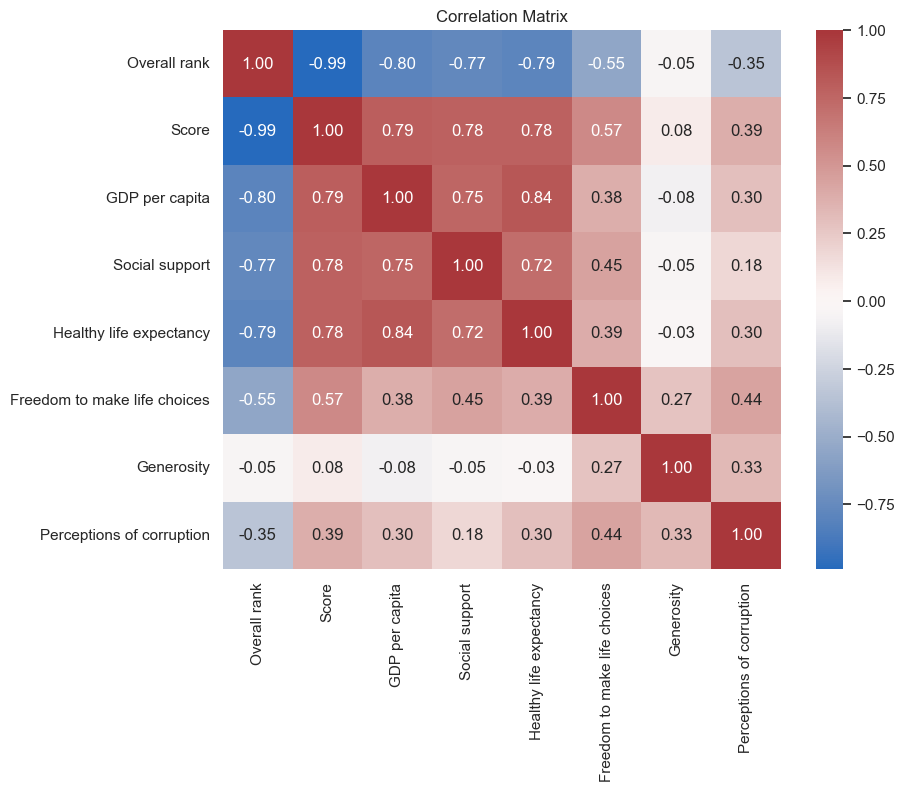

In [13]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(9, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlation Matrix")
plt.show()

## 08. 전처리 (결측 없음 → Pass)

## 09. Feature Engineering

In [14]:
pos_cols = [
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity"
]
df["Positive_factors"] = df[pos_cols].sum(axis=1) - df["Perceptions of corruption"]

# 등급화 예시: numpy를 이용해 경계 지정
bins   = np.array([0, 5, 6, 7, 8], dtype=float)
labels = ["Low", "Fair", "Good", "Excellent"]
df["Score_level"] = pd.cut(df["Score"], bins=bins, labels=labels, right=False)

print(df[["Country or region", "Score", "Positive_factors", "Score_level"]].head())


  Country or region  Score  Positive_factors Score_level
0           Finland  7.769             4.269   Excellent
1           Denmark  7.600             4.386   Excellent
2            Norway  7.554             4.631   Excellent
3           Iceland  7.494             4.857   Excellent
4       Netherlands  7.488             4.498   Excellent


## 10. 인사이트 예시

In [15]:
mean_pos = (
    df.groupby("Score_level")["Positive_factors"]
      .mean()
      .rename("Mean_Positive_factors")
)
print(mean_pos)

Score_level
Low          2.387593
Fair         3.530044
Good         4.023306
Excellent    4.448750
Name: Mean_Positive_factors, dtype: float64


/var/folders/2d/64mhpvhs7xd52wn05dhnxyym0000gn/T/ipykernel_9604/3738015020.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Score_level")["Positive_factors"]
